# Advanced Lane Finding
## Part 1 | Undistort and Transform Perspective

As we know, image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image; this transformation isn’t perfect. Distortion actually changes what the shape and size of these 3D objects appear to be. So, the first step in analyzing camera images, is to undo this distortion so that you can get correct and useful information out of them.

The following is some of the information on the distortion of the camera image processing. You can refer to this part of the information。

#### Types of Distortion

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called **radial distortion**, and it’s the most common type of distortion.

Another type of distortion, is **tangential distortion**. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.

#### Distortion Coefficients and Correction

There are three coefficients needed to correct for **radial distortion: k1, k2, and k3**. To correct the appearance of radially distorted points in an image, one can use a correction formula.

In the following equations, *(x,y)* is a point in a distorted image. To undistort these points, OpenCV calculates *r*, which is the known distance between a point in an undistorted (corrected) image *(x_corrected, y_corrected)* and the center of the image distortion, which is often the center of that image *(x_c, y_c)*. This center point *(x_c, y_c)* is sometimes referred to as the distortion center. These points are pictured below.

Note: The distortion coefficient **k3** is required to accurately reflect major radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, k3 has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: [k1, k2, p1, p2, k3]. In this course, we will use it in all calibration calculations so that our calculations apply to a wider variety of lenses (wider, like wide angle, haha) and can correct for both minor and major radial distortion.

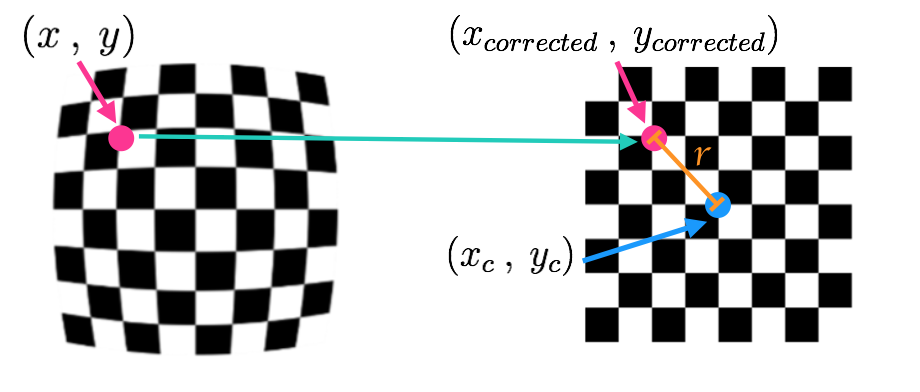*Points in a distorted and undistorted (corrected) image. The point (x, y) is a single point in a distorted image and (x_corrected, y_corrected) is where that point will appear in the undistorted (corrected) image.*

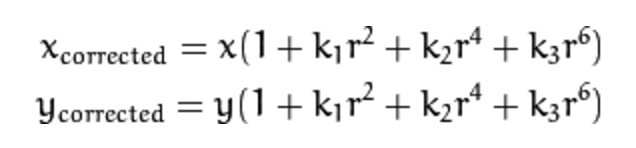*Radial distortion correction.*

There are two more coefficients that account for **tangential distortion**: **p1** and **p2**, and this distortion can be corrected using a different correction formula.

*Tangential distortion correction.*

## Finding Corners
Okay, let's start now。This is your first project. In this exercise, you'll use the OpenCV functions **findChessboardCorners()** and **drawChessboardCorners()** to automatically find and draw corners in an image of a chessboard pattern.

To learn more about both of those functions, you can have a look at the OpenCV documentation here: [cv2.findChessboardCorners()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [cv2.drawChessboardCorners()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners).

Applying these two functions to a sample image, you'll get a result like this:

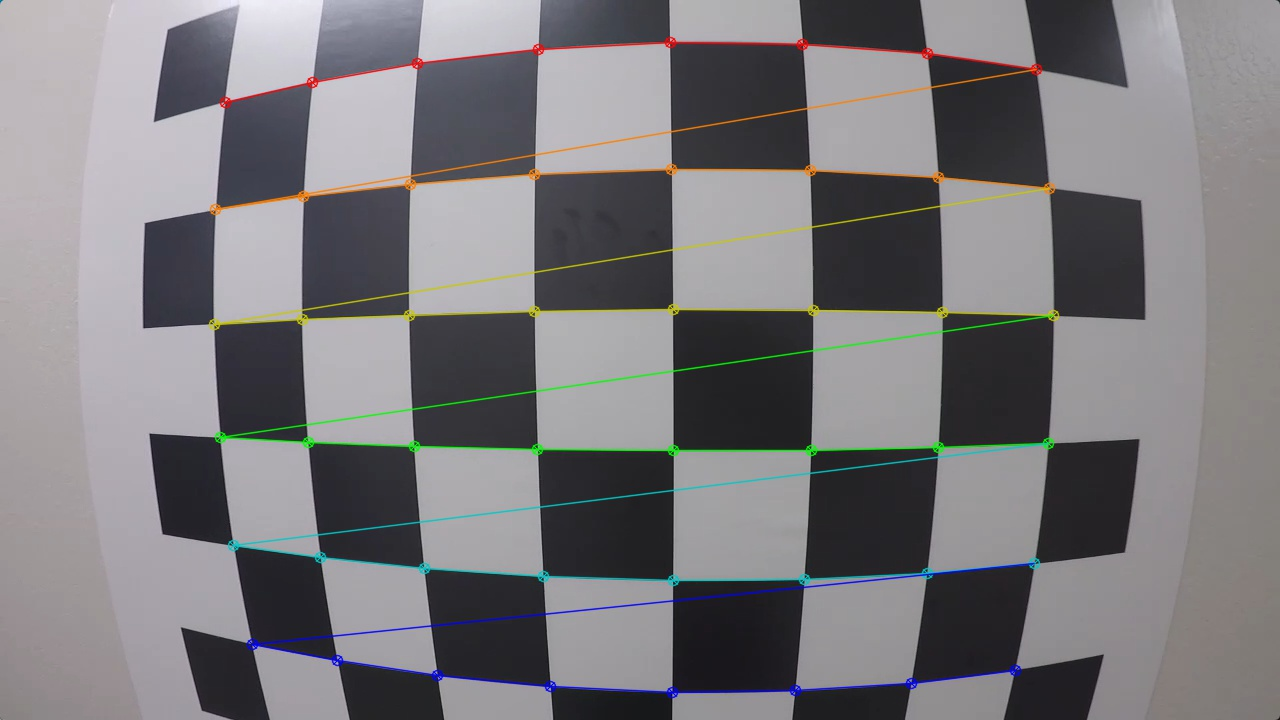

In the following exercise, your job is simple. Count the number of corners in any given row and enter that value in nx. Similarly, count the number of corners in a given column and store that in ny. Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.


### Quiz

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline

# TODO: 
# prepare object points 
nx = None  # enter the number of inside corners in x 
ny = None  # enter the number of inside corners in y

# Make a list of calibration images 
fname = "calibration_test.jpg"
img = cv2.imread(fname)

# Convert to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners 
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners 
if ret == True:
    # Draw and display the corners 
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)   

## Camera Calibration

Before you start, there are some precautions you need to know. 
### Note Regarding Corner Coordinates
Since the origin corner is (0,0,0) the final corner is (6,4,0) relative to this corner rather than (7,5,0).
#### Examples of Useful Code
Converting an image, imported by cv2 or the glob API, to grayscale:
```
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
```
Note: If you are reading in an image using mpimg.imread() this will read in an **RGB** image and you should convert to grayscale using *cv2.COLOR_RGB2GRAY*, but if you are using *cv2.imread()* or the glob API, as happens in this video example, this will read in a **BGR** image and you should convert to grayscale using *cv2.COLOR_BGR2GRAY*. We'll learn more about color conversions later on in this lesson, but please keep this in mind as you write your own code and look at code examples.

Finding chessboard corners (for an 8x6 board):
```
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
```
Drawing detected corners on an image:
```
img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
```
Camera calibration, given object points, image points, and the **shape of the grayscale image**:
```
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
```
Undistorting a test image:
```
dst = cv2.undistort(img, mtx, dist, None, mtx)
```
### A note on image shape
The shape of the image, which is passed into the **calibrateCamera** function, is just the height and width of the image. One way to retrieve these values is by retrieving them from the **grayscale image shape** array *gray.shape[::-1]*. This returns the image width and height in pixel values like (1280, 960).

Another way to retrieve the image shape, is to get them directly from the color image by retrieving the first two values in the color image shape array using *img.shape[1::-1]*. This code snippet asks for just the first two values in the shape array, and reverses them. Note that in our case we are working with a greyscale image, so we only have 2 dimensions (color images have three, height, width, and depth), so this is not necessary.

It's important to use an entire grayscale image shape or the first two values of a color image shape. This is because the entire shape of a color image will include a third value -- the number of color channels -- in addition to the height and width of the image. For example the shape array of a color image might be (960, 1280, 3), which are the pixel height and width of an image (960, 1280) and a third value (3) that represents the three color channels in the color image which you'll learn more about later, and if you try to pass these three values into the calibrateCamera function, you'll get an error.

In [ ]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline 

# Read in a calibration image 
img = mpimg.imread("./calibration_wide/GOPR0032.jpg")
plt.imshow(img)

Okay, now you have a certain understanding of our sample data. Just run the code in the cell below to extract object points and image points for camera calibration.  

### Quiz

In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
# %matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

If the above cell ran sucessfully, you should now have objpoints and imgpoints needed for camera calibration.

## Correcting for Distortion



Here, you'll get a chance to try camera calibration and distortion correction for yourself!

There are two main steps to this process: use chessboard images to obtain image points and object points, and then use the OpenCV functions `cv2.calibrateCamera()` and `cv2.undistort()` to compute the calibration and undistortion.

Unfortunately, we can't perform the extraction of object points and image points in the browser quiz editor, so we provide these for you in the quiz below.

Try computing the calibration and undistortion in the exercise below.

### Quiz

In [ ]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# TODO:
# Do camera calibration given object points and image points
# You can use cv2.calibrateCamera()
ret, mtx, dist, rvecs, tvecs = None


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Congratulations, now you have an idea of how to correcting for distortion. 
There is an advanced project provided for you. 

## Undistort and Transform Perspective


Here's a tricky quiz for you! You have now seen how to find corners, calibrate your camera, undistort an image, and apply a perspective transform. Now it's your chance to perform all these steps on an image. In the last quiz you calibrated the camera, so here I'm giving you the camera matrix, mtx, and the distortion coefficients dist to start with.

Your goal is to generate output like the image shown above. To do that, you need to write a function that takes your distorted image as input and completes the following steps:

- Undistort the image using cv2.undistort() with mtx and dist
- Convert to grayscale
- Find the chessboard corners
- Draw corners
- Define 4 source points (the outer 4 corners detected in the chessboard pattern)
- Define 4 destination points (must be listed in the same order as src points!)
- Use cv2.getPerspectiveTransform() to get M, the transform matrix
- use cv2.warpPerspective() to apply M and warp your image to a top-down view

**HINT**: Source points are the x and y pixel values of any four corners on your chessboard, you can extract these from the corners array output from cv2.findChessboardCorners(). Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.
If you run into any errors as you run your code, please refer to the Examples of Useful Code section in the previous video and make sure that your code syntax matches up! For this example, please also refer back to the examples in the Calibrating Your Camera video.

### Quiz

In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load(open( "calibration_wide/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('calibration_wide/GOPR0032.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# TODO: 
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    pass

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
